In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import Dataset

In [11]:
df = pd.read_csv('aug_train.csv')

df.sample(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
5015,12383,city_14,0.698,NaN,Has relevent experience,no_enrollment,Graduate,Business Degree,13,<10,Pvt Ltd,1,278,0.0
16300,12302,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,10000+,Pvt Ltd,4,4,0.0
9707,30225,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,3,167,1.0
16418,24428,city_16,0.910,Male,No relevent experience,no_enrollment,Graduate,STEM,<1,50-99,Pvt Ltd,1,12,0.0
4006,810,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,128,0.0
8688,12326,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,<10,Funded Startup,1,10,0.0
13706,14682,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,14,10000+,Pvt Ltd,>4,16,0.0
16910,4251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,5000-9999,Pvt Ltd,>4,12,0.0
18835,11753,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Arts,5,NaN,NaN,never,101,0.0
6710,942,city_16,0.910,Female,Has relevent experience,no_enrollment,Graduate,STEM,12,10/49,Pvt Ltd,1,84,0.0


In [13]:
df.shape

(19158, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [17]:
cats=['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size',
      'company_type','last_new_job']
nums=['enrollee_id','city_development_index','training_hours','target']

In [18]:
df[nums].describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [19]:
df[cats].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [23]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [28]:
df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23288\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23288\3050400788.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

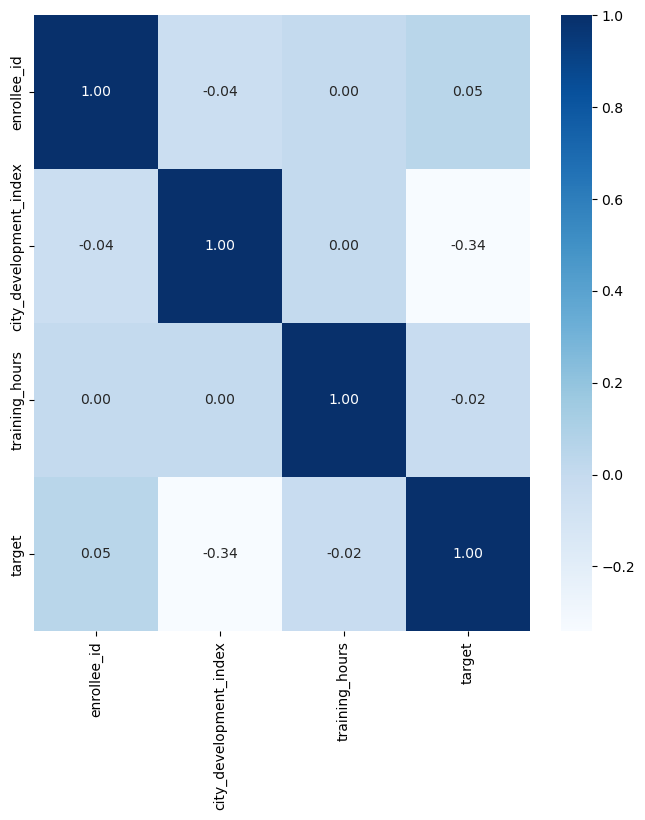

In [25]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')